# Datasets description

dataset:
three dataset:
first:
y: close price, x : all news parameters and extra info
file: close_all_news_extra check
second:
y: close price, x : three news parameters and extra info
file: close_three_news_extra check 
third:
y: close price - open price, x : all news parameters and extra info
file: different_all_news_extra
fourth:
y: close price - open price, x :  three news parameters and extra info
file: different_three_news_extra check

In [119]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
from sklearn import datasets, linear_model, preprocessing
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
import sklearn.linear_model
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
import numpy.random as r

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [120]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import optimizers
import keras.backend as K
K.clear_session()

In [121]:
close_all_news_extra = pd.read_csv("close_all_news_extra.csv")
close_all_news_extra = close_all_news_extra.drop(columns= ["appear"])

close_three_news_extra = pd.read_csv("close_three_news_extra.csv")
close_three_news_extra = close_three_news_extra.drop(columns= ["appearence"])

different_all_news_extra = pd.read_csv("different_all_news_extra.csv")
different_all_news_extra = different_all_news_extra.drop(columns= ["appear"])

different_three_news_extra = pd.read_csv("different_three_news_extra.csv")
different_three_news_extra = different_three_news_extra.drop(columns= ["appearence"])

print(different_all_news_extra.shape)
print(close_all_news_extra.shape)

(658, 40)
(658, 40)


In [122]:
xx = [1,2,3,4,5]
yy = [1,2,3,4,5]


In [123]:
close_all_news_extra.columns

Index(['Unnamed: 0', 'Euro exchange rate', 'Date', 'Hong Kong exchange rate',
       'Canada exchange rate', 'China exchange rate', 'QCOM close price',
       'MSFT close price', 'TXN close price', 'APPL close price',
       'social_media', 'computer', 'business', 'programming', 'hearing',
       'urban', 'shopping', 'science', 'work', 'valuable', 'fashion',
       'technology', 'competing', 'economics', 'office', 'cheerfulness',
       'optimism', 'celebration', 'trust', 'positive_emotion', 'hate',
       'aggression', 'horror', 'suffering', 'ridicule', 'irritability',
       'deception', 'disappointment', 'negative_emotion', 'nervousness'],
      dtype='object')

In [124]:
close_three_news_extra.columns

Index(['Unnamed: 0', 'Euro exchange rate', 'Date', 'Hong Kong exchange rate',
       'Canada exchange rate', 'China exchange rate', 'QCOM close price',
       'MSFT close price', 'TXN close price', 'APPL close price',
       'new_correlation', 'pos_re', 'neg_re'],
      dtype='object')

In [125]:
def plot(test, prediction, num, title):
    plt.plot(num, prediction, 'r-', label = "prediction")
    plt.plot(num, test, 'b-', label ="real value")
    plt.title(title)
    plt.legend(loc = "upper right")
    plt.show()

In [126]:
# pull out the y and x, and transfer into dataset:
def transfer_dataframe_to_x_y(dataframe, y_colum):
    #y_dataframe = dataframe[y_colum]
    dataframe = dataframe.dropna()
    y = dataframe[y_colum].values
    y = y.reshape(y.shape[0],1)
    x_dataframe = dataframe.drop(columns= [y_colum,"Date"])
    x = x_dataframe.values
    return x,y

# Linear Regression models
now we have a table that:
        redge degree:   0, 0.35, 0.5, 0.75
        polynomial degree: 1, 2


In [127]:
X_close_three_news_extra,Y_close_three_news_extra = transfer_dataframe_to_x_y(close_three_news_extra,"APPL close price")
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y(different_three_news_extra,"APPL diff")
X_close_all_news_extra, Y_close_all_news_extra = transfer_dataframe_to_x_y(close_all_news_extra,"APPL close price")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y(different_all_news_extra,"APPL diff")
print()

In [128]:
def linear_fit(X_train, X_test, Y_train, Y_test, alpha):
    ridge = Ridge(alpha)
    ridge.fit(X_train,Y_train)
    train_error = (1/Y_train.shape[0])*np.sum((Y_train-ridge.predict(X_train))**2)
    test_error = (1/Y_test.shape[0])*np.sum((Y_test-ridge.predict(X_test))**2)
    R2 = 1 - np.sum((Y_train - ridge.predict(X_train))**2) / np.sum((Y_train - np.mean(Y_train))**2)
    return train_error, test_error, R2, ridge

In [129]:
def model_selection(X, Y):
    deg_list = [1,2,3,4,5]
    alpha_list = [0,0.35,0.5,0.75]
    mse_tr = []
    mse_test = []
    for elem in deg_list:
        temp_mse_tr = None
        temp_mse_test = None
        if elem != 1:
    #         print(elem)
            poly = PolynomialFeatures(int(elem))
            X_poly = poly.fit_transform(X)
            Y_poly = Y
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.3)
        else:
            Y_poly = Y
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X, Y, test_size=0.3)            
        for alpha in alpha_list:
#             print(alpha)
            train_error, test_error, R2, ridge = linear_fit(X_train_poly, X_test_poly, Y_train_poly, Y_test_poly, float(alpha))
#             print("train_error: ", train_error, "alpha: ", alpha)
#             print("before condition: ", temp_mse_tr)
            if temp_mse_tr is None:
                temp_mse_tr = (train_error, float(alpha))
            elif temp_mse_tr[0] > train_error:
#                 print("updating: ", alpha)
                temp_mse_tr = (train_error, float(alpha))
                
            if temp_mse_test is None:
                temp_mse_test = (test_error, float(alpha))
            elif temp_mse_test[0] > test_error:
                temp_mse_test = (test_error, float(alpha))
        mse_tr.append(temp_mse_tr)  
        mse_test.append(temp_mse_test) 
        
            
    return mse_tr, mse_test

In [130]:
def plot_model_sel(X,Y,alpha):

    deg_list = [1,2,3,4,5]
    mse_tr = []
    mse_test = []
    for elem in deg_list:
        temp_mse_tr = None
        temp_mse_test = None
        if elem == 1:
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X, Y, test_size=0.3)
            train_error, test_error, R2, ridge = linear_fit(X_train_poly, X_test_poly, Y_train_poly, Y_test_poly, float(alpha))
            mse_tr.append(train_error)
            mse_test.append(test_error)
        else:
            poly = PolynomialFeatures(int(elem))
            X_poly = poly.fit_transform(X)
            Y_poly = Y
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.3)
            train_error, test_error, R2, ridge = linear_fit(X_train_poly, X_test_poly, Y_train_poly, Y_test_poly, float(alpha))
            mse_tr.append(train_error)
            mse_test.append(test_error)

    plt.plot(deg_list, mse_tr, "r-", label = "train_mse")
    plt.plot(deg_list, mse_test, "b-", label = "test_mse")
    plt.xlabel("Model order")
    plt.ylabel("MSE")
    plt.grid()
    plt.ylim(0,300)
    plt.legend(loc = "upper right")
    plt.show()
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.05426e-20): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


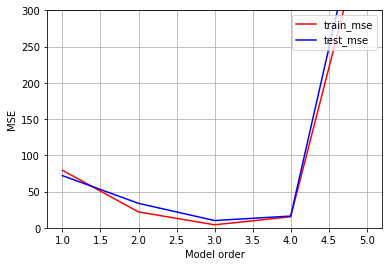

In [131]:
plot_model_sel(X_close_three_news_extra,Y_close_three_news_extra, 0.75)

In [132]:
def linear_regression_model(X, Y, degree, alpha, start, end):
    # dataset poly transfor:
    poly = PolynomialFeatures(int(alpha))
    X_poly = poly.fit_transform(X)
    Y_poly = Y
    y_plot = Y[int(start):int(end)]
    x_plot = X[int(start):int(end)]
    x_plot2 = X_poly[int(start):int(end)]
    y_plot2 = Y_poly[int(start):int(end)]
    

    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    X_train_poly, X_test_ploy, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.3)
    num = np.arange(len(X_test))
    # non poly, non redge:
    train_error, test_error, R2,ridge = linear_fit(X_train, X_test, Y_train, Y_test,0)
    prediction = ridge.predict(x_plot)
    
    num = np.arange(len(x_plot))
    plot(y_plot, prediction, num, "2 poly, 0.75 ridge")
    print( str(degree) + " poly," + str(alpha) + "non redge: train_error = {0:.2f} and test_error = {1:.2f}, r^2 = {2:.2f}".format(train_error,test_error,R2))
    

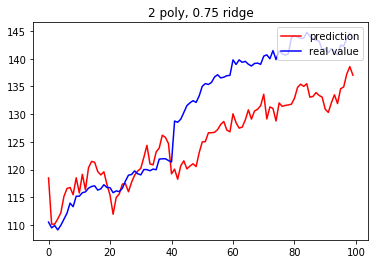

2 poly,0.75non redge: train_error = 65.49 and test_error = 49.31, r^2 = 0.76


In [133]:
linear_regression_model(X_close_three_news_extra,Y_close_three_news_extra,2,0.75, 500, 600)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.33472e-22): result may not be accurate.
  overwrite_a=True).T


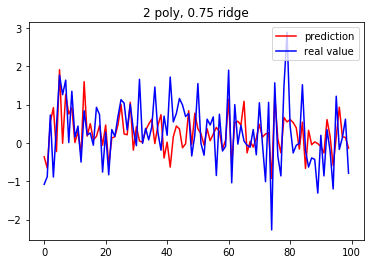

2 poly,0.75non redge: train_error = 1.23 and test_error = 1.52, r^2 = 0.25


In [134]:
linear_regression_model(X_different_three_news_extra,Y_different_three_news_extra,2, 0.75, 500, 600)

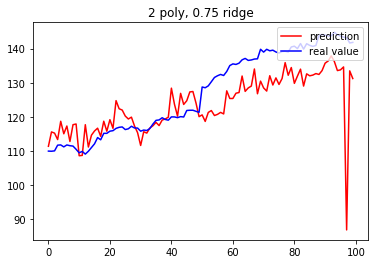

2 poly,0.75non redge: train_error = 47.48 and test_error = 74.42, r^2 = 0.84


In [135]:
linear_regression_model(X_close_all_news_extra,Y_close_all_news_extra,2,0.75, 500, 600)

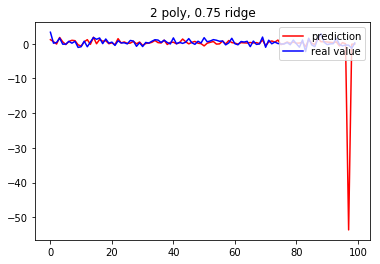

2 poly,0.75non redge: train_error = 1.19 and test_error = 15.85, r^2 = 0.33


In [136]:
linear_regression_model(X_different_all_news_extra,Y_different_all_news_extra,2,0.75, 500, 600)

# SVM models

Before process the SVM models, we need to transfer the y to 1 or -1

In [137]:
def transfer_y_binary(value):
    if value < 0:
        out = -1
    else:
        out = 1
    return out

In [138]:
def transfer_dataframe_to_x_y_for_SVM(dataframe, y_colum):
    #y_dataframe = dataframe[y_colum]
    dataframe = dataframe.dropna()
    y = dataframe[y_colum].values
    x_dataframe = dataframe.drop(columns= [y_colum,"Date"])
    x = x_dataframe.values
    return x,y

In [139]:
different_all_news_extra["APPL diff"] = different_all_news_extra["APPL diff"].apply(transfer_y_binary)
different_three_news_extra["APPL diff"] = different_three_news_extra["APPL diff"].apply(transfer_y_binary)

In [83]:
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y_for_SVM(different_three_news_extra,"APPL diff")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y_for_SVM(different_all_news_extra,"APPL diff")


We need three kernals, with mutiple c as soft margin. <br>
kernal one: linear <br>
kernal two: RBF <br>
kernal three: Polynomial Kernel <br>

## SVM_linear

In [84]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

In [85]:
def svm_linear(X_train, X_test, Y_train, Y_test,c):
    svc_linear = svm.SVC(probability = False, kernel = "linear", C = c)
    
    svc_linear.fit(X_train,Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))

    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    c_svm_linear.append(c)

In [30]:
def plot_svm(c_svm_linear, acc_train_svm_linear, acc_test_svm_linear):
    plt.plot(c_svm_linear,acc_train_svm_linear,'g.-',label='train accuracy')
    plt.plot(c_svm_linear,acc_test_svm_linear,'r.-',label='test accuracy')
    plt.legend(loc='upper right')
    plt.show()

In [31]:
def SVM_linear(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    cVals = list(np.arange(0.001,5,0.5))

    for c in cVals:
        print(c)
        svm_linear(X_train, X_test, Y_train, Y_test ,c)
    plot_svm(c_svm_linear, acc_train_svm_linear, acc_test_svm_linear)


In [32]:
cVals = list(np.arange(0.001,2,0.05))
print(cVals)

[0.001, 0.051000000000000004, 0.101, 0.15100000000000002, 0.201, 0.251, 0.30100000000000005, 0.35100000000000003, 0.401, 0.451, 0.501, 0.551, 0.6010000000000001, 0.651, 0.7010000000000001, 0.751, 0.801, 0.8510000000000001, 0.901, 0.9510000000000001, 1.001, 1.051, 1.101, 1.151, 1.201, 1.251, 1.301, 1.351, 1.401, 1.451, 1.501, 1.551, 1.601, 1.651, 1.701, 1.751, 1.801, 1.851, 1.901, 1.951]


0.001
Train Accuracy = 0.528634
Test Accuracy = 0.558974
0.501
Train Accuracy = 0.662996
Test Accuracy = 0.692308
1.001
Train Accuracy = 0.658590
Test Accuracy = 0.682051
1.501
Train Accuracy = 0.662996
Test Accuracy = 0.702564
2.001
Train Accuracy = 0.669604
Test Accuracy = 0.707692
2.501
Train Accuracy = 0.662996
Test Accuracy = 0.712821
3.001
Train Accuracy = 0.665198
Test Accuracy = 0.717949
3.501
Train Accuracy = 0.658590
Test Accuracy = 0.717949
4.001
Train Accuracy = 0.662996
Test Accuracy = 0.717949
4.501
Train Accuracy = 0.662996
Test Accuracy = 0.717949


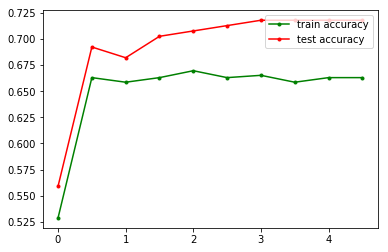

In [161]:
SVM_linear(X_different_three_news_extra,Y_different_three_news_extra)


0.001
Train Accuracy = 0.519565
Test Accuracy = 0.580808
0.501
Train Accuracy = 0.678261
Test Accuracy = 0.686869
1.001
Train Accuracy = 0.678261
Test Accuracy = 0.681818
1.501
Train Accuracy = 0.682609
Test Accuracy = 0.666667
2.001
Train Accuracy = 0.669565
Test Accuracy = 0.671717
2.501
Train Accuracy = 0.667391
Test Accuracy = 0.671717
3.001
Train Accuracy = 0.669565
Test Accuracy = 0.666667
3.501
Train Accuracy = 0.669565
Test Accuracy = 0.666667
4.001
Train Accuracy = 0.669565
Test Accuracy = 0.676768
4.501
Train Accuracy = 0.673913
Test Accuracy = 0.651515


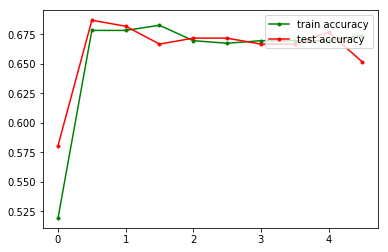

In [162]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []
SVM_linear(X_different_all_news_extra, Y_different_all_news_extra )

## SVM with RBF

In [33]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

In [34]:
def svm_rbf(X_train, X_test, Y_train, Y_test,c):
    svc_linear = svm.SVC(probability = False, kernel = "rbf", C = c)
    
    svc_linear.fit(X_train,Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_rbf.append(c)

In [35]:
def SVM_rbf(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    cVals = list(np.arange(0.001,5,0.5))

    for c in cVals:
        print(c)
        svm_rbf(X_train, X_test, Y_train, Y_test ,c)
    plot_svm(c_svm_rbf,acc_train_svm_rbf,acc_test_svm_rbf)

0.001
Train Accuracy = 0.526432
Test Accuracy = 0.564103
0.501
Train Accuracy = 0.823789
Test Accuracy = 0.497436
1.001
Train Accuracy = 0.845815
Test Accuracy = 0.502564
1.501
Train Accuracy = 0.859031
Test Accuracy = 0.502564
2.001
Train Accuracy = 0.865639
Test Accuracy = 0.517949
2.501
Train Accuracy = 0.885463
Test Accuracy = 0.517949
3.001
Train Accuracy = 0.896476
Test Accuracy = 0.512821
3.501
Train Accuracy = 0.900881
Test Accuracy = 0.512821
4.001
Train Accuracy = 0.911894
Test Accuracy = 0.517949
4.501
Train Accuracy = 0.914097
Test Accuracy = 0.507692


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

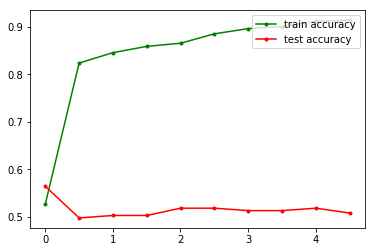

In [36]:
SVM_rbf(X_different_three_news_extra,Y_different_three_news_extra)

0.001
Train Accuracy = 0.539130
Test Accuracy = 0.535354
0.501
Train Accuracy = 0.708696
Test Accuracy = 0.540404
1.001
Train Accuracy = 0.717391
Test Accuracy = 0.525253
1.501
Train Accuracy = 0.721739
Test Accuracy = 0.530303
2.001
Train Accuracy = 0.736957
Test Accuracy = 0.535354
2.501
Train Accuracy = 0.752174
Test Accuracy = 0.530303
3.001
Train Accuracy = 0.756522
Test Accuracy = 0.545455
3.501


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Train Accuracy = 0.760870
Test Accuracy = 0.535354
4.001
Train Accuracy = 0.758696
Test Accuracy = 0.535354
4.501
Train Accuracy = 0.771739
Test Accuracy = 0.520202


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


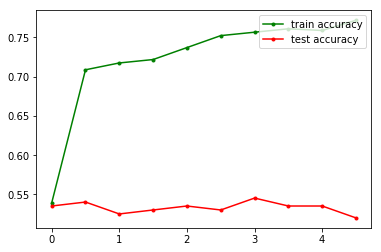

In [37]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []
SVM_rbf(X_different_all_news_extra, Y_different_all_news_extra )

In [38]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [39]:
def svm_poly(X_train, X_test, Y_train, Y_test,c):
    svc_linear = svm.SVC(probability = False, kernel = "rbf", C = c)
    
    svc_linear.fit(X_train,Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_poly.append(c)

In [40]:
def SVM_poly(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    cVals = list(np.arange(0.001,5,0.5))

    for c in cVals:
        print(c)
        svm_poly(X_train, X_test, Y_train, Y_test ,c)
    plot_svm(c_svm_poly,acc_train_svm_poly,acc_test_svm_poly)

0.001
Train Accuracy = 0.533040
Test Accuracy = 0.548718
0.501
Train Accuracy = 0.788546
Test Accuracy = 0.487179
1.001
Train Accuracy = 0.828194
Test Accuracy = 0.502564
1.501
Train Accuracy = 0.848018
Test Accuracy = 0.512821
2.001
Train Accuracy = 0.861233
Test Accuracy = 0.512821
2.501
Train Accuracy = 0.881057
Test Accuracy = 0.517949
3.001
Train Accuracy = 0.887665
Test Accuracy = 0.507692
3.501
Train Accuracy = 0.892070
Test Accuracy = 0.502564
4.001
Train Accuracy = 0.905286
Test Accuracy = 0.497436
4.501
Train Accuracy = 0.918502
Test Accuracy = 0.497436


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

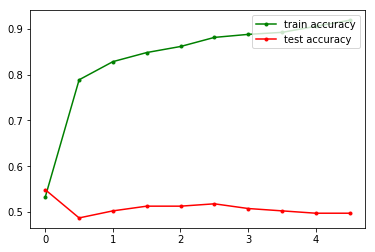

In [41]:
SVM_poly(X_different_three_news_extra,Y_different_three_news_extra)

0.001
Train Accuracy = 0.528261
Test Accuracy = 0.560606
0.501
Train Accuracy = 0.715217
Test Accuracy = 0.489899
1.001
Train Accuracy = 0.741304
Test Accuracy = 0.489899
1.501
Train Accuracy = 0.741304
Test Accuracy = 0.484848
2.001
Train Accuracy = 0.743478
Test Accuracy = 0.494949
2.501
Train Accuracy = 0.760870
Test Accuracy = 0.484848
3.001
Train Accuracy = 0.767391


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Test Accuracy = 0.469697
3.501
Train Accuracy = 0.776087
Test Accuracy = 0.479798
4.001
Train Accuracy = 0.782609
Test Accuracy = 0.474747
4.501
Train Accuracy = 0.789130
Test Accuracy = 0.494949


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

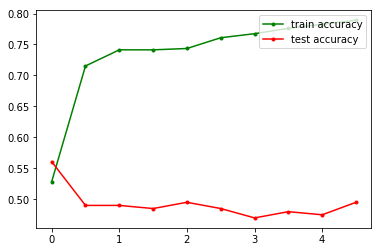

In [42]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []
SVM_poly(X_different_all_news_extra, Y_different_all_news_extra )

# Neural Network models

### non-lib

In [49]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 2))
    for i in range(len(y)):
        if y[i] <= 0:
            y_vect[i][0] = 1
        else:
            y_vect[i][1] = 1
    return y_vect

def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    print(y)
    return y

In [50]:
# convert y to [1,0] and [0,1]

In [51]:
different_all_news_extra["APPL diff"] = different_all_news_extra["APPL diff"].apply(transfer_y_binary)
different_three_news_extra["APPL diff"] = different_three_news_extra["APPL diff"].apply(transfer_y_binary)

In [52]:
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y_for_SVM(different_three_news_extra,"APPL diff")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y_for_SVM(different_all_news_extra,"APPL diff")


In [53]:
print(X_different_three_news_extra.shape)

(649, 11)


In [54]:
nn_structure = [11, 12, 2]

nn_structure2 = []

X_train, X_test, Y_train, Y_test = train_test_split(X_different_three_news_extra, Y_different_three_news_extra, test_size=0.3)
Y_V_train = convert_y_to_vect(Y_train)
Y_V_test = convert_y_to_vect(Y_test)
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, Y_V_train, 3000)

# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(Y_test, y_pred) * 100))

NameError: name 'r' is not defined

### keras lib


In [55]:
def transfer_y_binary_keras(value):
    if value < 0:
        out = 0
    else:
        out = 1
    return out

In [56]:
def transfer_dataframe_to_x_y_for_SVM(dataframe, y_colum):
    #y_dataframe = dataframe[y_colum]
    dataframe = dataframe.dropna()
    y = dataframe[y_colum].values
    x_dataframe = dataframe.drop(columns= [y_colum,"Date"])
    x = x_dataframe.values
    return x,y

In [57]:
different_all_news_extra["APPL diff"] = different_all_news_extra["APPL diff"].apply(transfer_y_binary_keras)
different_three_news_extra["APPL diff"] = different_three_news_extra["APPL diff"].apply(transfer_y_binary_keras)


In [58]:
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y_for_SVM(different_three_news_extra,"APPL diff")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y_for_SVM(different_all_news_extra,"APPL diff")
X_different_three_news_extra = StandardScaler().fit_transform(X_different_three_news_extra)
X_different_all_news_extra =  StandardScaler().fit_transform(X_different_all_news_extra)


In [59]:
# passing x, y before separate into train and test
# hidenLayer is hidden layer as list. eg [10,4,2] is three hiden layer with 10 number of Neural etc. 
# activation is activation function
# activity_regularizer is how much to regularizer
### kernel_constraint is for constraint number using 
# optimizer is optimiz function such as sgd
# batch_size is smaple size for each gd renew, 每次梯度更新的样本数
# epochs: number iterations of generation
def nn_classifier(x, y, hidenLayer, activation, regularizer, 
                  optimizer, batch_size, epochs):
    
    model = Sequential()
    n_parameter = x.shape[1]
    model.add(Dense(hidenLayer[0], input_shape = (n_parameter,), activation = activation, name = "hidden",
                   activity_regularizer = regularizers.l2(regularizer)))
    
    if len(hidenLayer) > 1:
        for layer in range(1,len(hidenLayer)):
            name_in = "hidden" + str(layer)
            model.add(Dense(hidenLayer[layer], activation = activation, name = name_in,
                   activity_regularizer = regularizers.l2(regularizer)))
            
    model.add(Dense(1, activation=activation,activity_regularizer = regularizers.l2(regularizer), 
                    name='output'))
    
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

    model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size,verbose=0)

    lossi_Out, Eout = model.evaluate(X_test,Y_test, verbose=0)
    lossi_In, Ein = model.evaluate(X_train,Y_train, verbose=0)
    
    model.summary()
    print()
    print("RESULT: ")
    print("optimizer="+optimizer+", activation=" + activation) 
    print("batch_size=%3d, epoch=%4d, regularizer=%7.5f, loss=%12.4e, Ein=%7.5f, Eout=%7.5f" % (batch_size, 
                                                                                               epochs,
                                                                                               regularizer,
                                                                                               lossi_In,
                                                                                               Ein,
                                                                                               Eout))
    print()
 

In [60]:
K.clear_session()
nn_classifier(X_different_all_news_extra, Y_different_all_news_extra,[20,13],'sigmoid', 0.0001,"rmsprop",600,2000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 20)                780       
_________________________________________________________________
hidden1 (Dense)              (None, 13)                273       
_________________________________________________________________
output (Dense)               (None, 1)                 14        
Total params: 1,067
Trainable params: 1,067
Non-trainable params: 0
_________________________________________________________________

RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size=600, epoch=2000, regularizer=0.00010, loss=  4.8264e-01, Ein=0.72433, Eout=0.56061



In [61]:
K.clear_session()
nn_classifier(X_different_three_news_extra, Y_different_three_news_extra,[5],'sigmoid', 0.0001,"rmsprop",600,2000)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 5)                 60        
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________

RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size=600, epoch=2000, regularizer=0.00010, loss=  5.8335e-01, Ein=0.68208, Eout=0.64615



In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_different_all_news_extra, Y_different_all_news_extra, test_size=0.3)
print(Y_test)



[0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 1 1]
